In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet18_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter,saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.338, ECE: 0.027
Optimal temperature: 0.992
After temperature - NLL: 1.338, ECE: 0.025


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8233 ± 0.0017
Final Average Prediction Set Size: 6.57 ± 0.09
Final Average Coverage: 0.8011 ± 0.0041
Final Average Real Probability: 0.6821 ± 0.0041


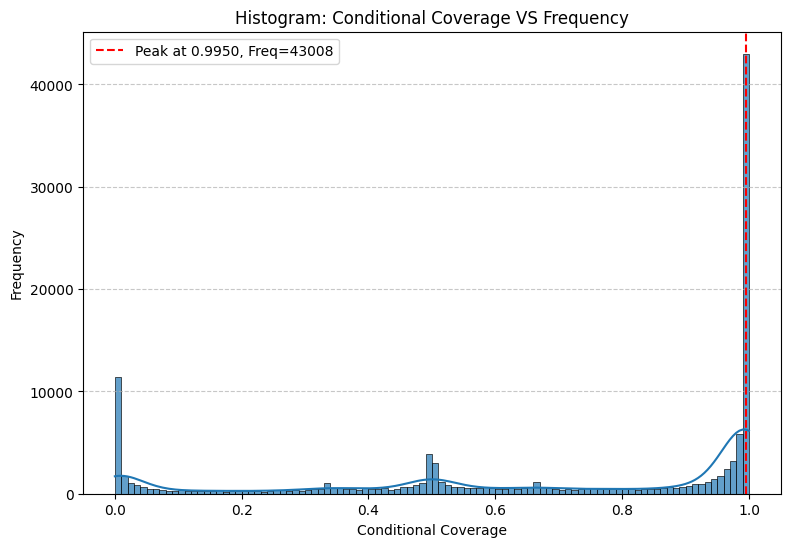

43008 (34.58%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8503 ± 0.0025
Final Average Prediction Set Size: 3.01 ± 0.01
Final Average Coverage: 0.7998 ± 0.0040
Final Average Real Probability: 0.6519 ± 0.0040


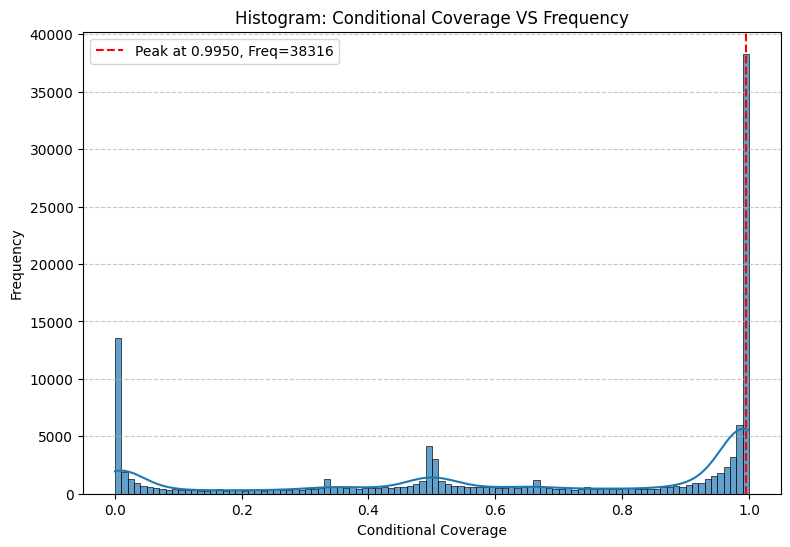

38316 (30.81%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=6, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8347 ± 0.0038
Final Average Prediction Set Size: 2.77 ± 0.02
Final Average Coverage: 0.7997 ± 0.0038
Final Average Real Probability: 0.6663 ± 0.0040


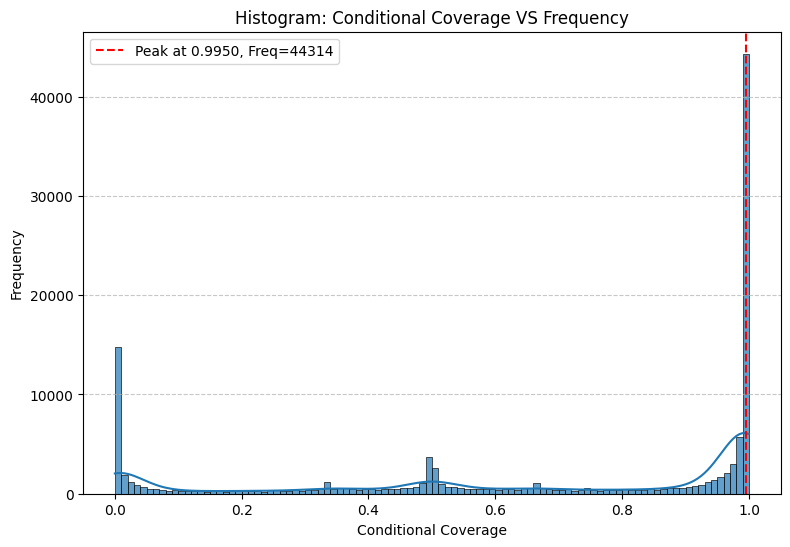

44314 (35.63%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8172 ± 0.0019
Final Average Prediction Set Size: 6.77 ± 0.11
Final Average Coverage: 0.7998 ± 0.0043
Final Average Real Probability: 0.6844 ± 0.0045


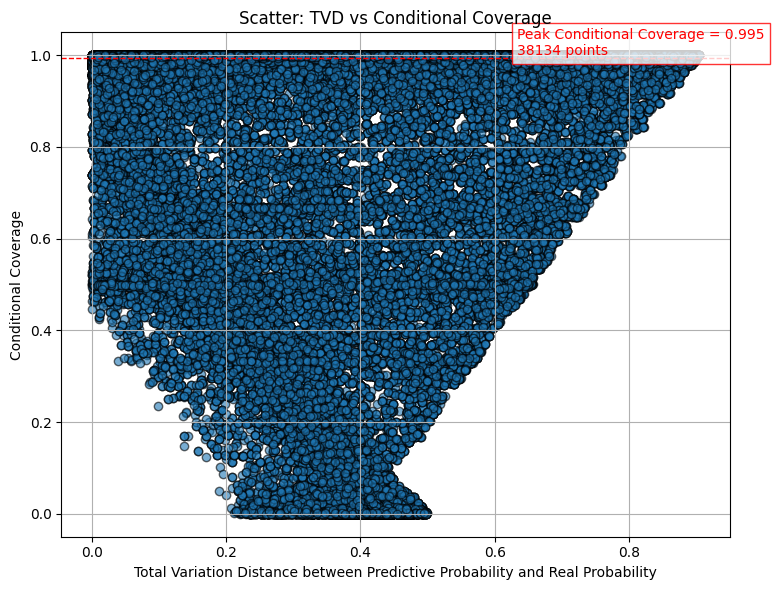

Peak Conditional Coverage = 0.995, with 38134 samples

=== Count Regions Summary ===
33414 (26.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
28672 (23.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
55536 (44.7%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.96606']
  Real Probability Set      : ['0.99206']
Sample 2:
  Predictive Probability Set: ['0.47924', '0.40071']
  Real Probability Set      : ['0.49976', '0.49980']
Sample 3:
  Predictive Probability Set: ['0.78854']
  Real Probability Set      : ['0.97608']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.56666', '0.33132']
  Real Probability Set      : ['0.00111', '0.00111']
Sample 2:
  Predictive Probability Set: ['0.51230', '0.16228', '0.15553']
  Real Probability Set      : ['0.06747', '0.06747', '0.00348']
Sample 3:
  Predictive Probability Set: ['0.441

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8464 ± 0.0025
Final Average Prediction Set Size: 3.06 ± 0.01
Final Average Coverage: 0.7995 ± 0.0042
Final Average Real Probability: 0.6547 ± 0.0043


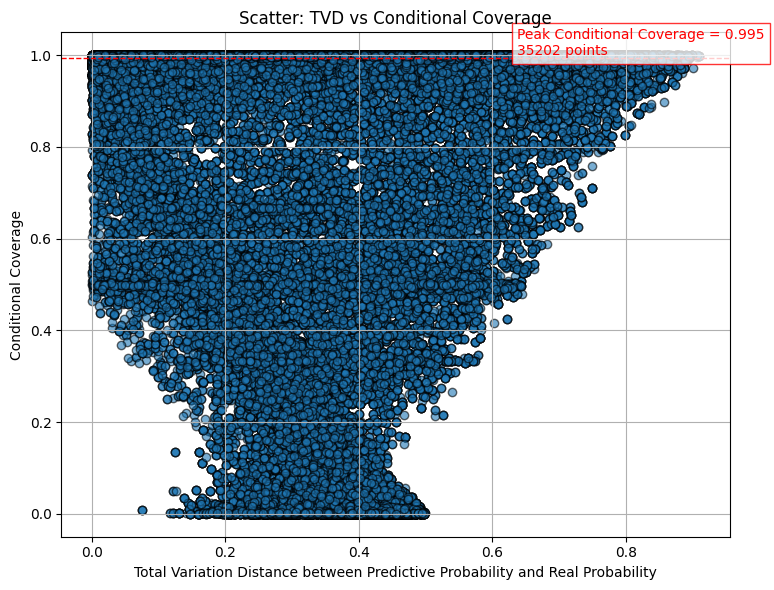

Peak Conditional Coverage = 0.995, with 35202 samples

=== Count Regions Summary ===
35882 (28.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
24074 (19.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
60231 (48.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.81514']
  Real Probability Set      : ['0.99525']
Sample 2:
  Predictive Probability Set: ['0.95900']
  Real Probability Set      : ['0.93470']
Sample 3:
  Predictive Probability Set: ['0.85664']
  Real Probability Set      : ['0.97003']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.16393', '0.08259', '0.06068', '0.02535', '0.02433', '0.01954', '0.01852', '0.01732', '0.01584', '0.01582', '0.01520', '0.01451', '0.01387']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000'

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=6, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8308 ± 0.0039
Final Average Prediction Set Size: 2.79 ± 0.02
Final Average Coverage: 0.7996 ± 0.0040
Final Average Real Probability: 0.6676 ± 0.0037


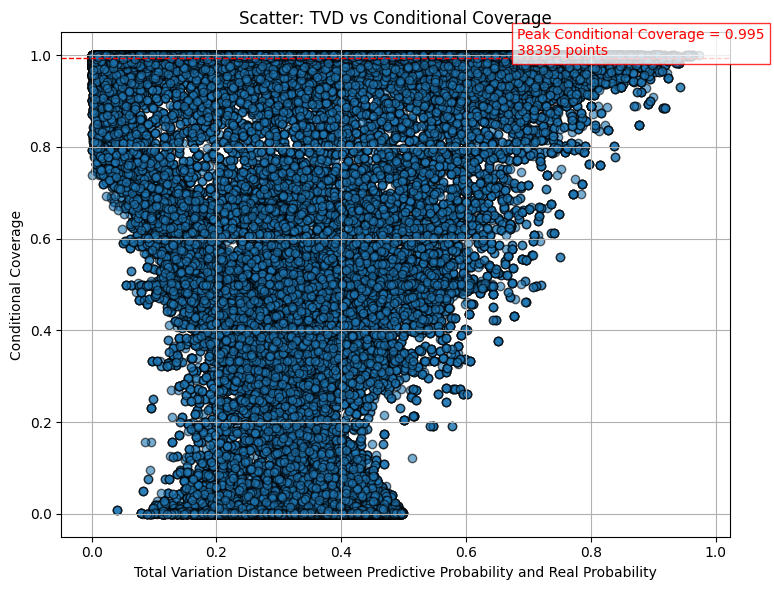

Peak Conditional Coverage = 0.995, with 38395 samples

=== Count Regions Summary ===
37291 (30.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
24423 (19.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
56044 (45.1%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.81559']
  Real Probability Set      : ['0.96568']
Sample 2:
  Predictive Probability Set: ['0.99164']
  Real Probability Set      : ['0.99941']
Sample 3:
  Predictive Probability Set: ['0.80451']
  Real Probability Set      : ['0.98472']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.18264', '0.10115', '0.05669', '0.05593', '0.04373', '0.03629', '0.03177', '0.02371']
  Real Probability Set      : ['0.00308', '0.00308', '0.00066', '0.00308', '0.00000', '0.00066', '0.00156', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.83656']
  Real Probability Set 

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2)